In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib qt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

data = pd.read_csv("air_data.csv", encoding="ansi")
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
doc1 = (data["SUM_YR_1"] !=0) |  (data["SUM_YR_2"] !=0)
doc2 = (data["SEG_KM_SUM"] == 0) & (data["avg_discount"] == 0)
data = data[doc1 | doc2]
data = data[data["GENDER"].notnull()]
print(data.shape)

labels = '男', '女'
s1 = data[data["GENDER"] == '男']
per = s1["GENDER"].count()/data["GENDER"].count()
sizes = [per, 1-per]
#explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

(62041, 44)


In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib qt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

data = pd.read_csv("air_data.csv", encoding="ansi")
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)
data = data[index1 | index2 | index3]
# print(data)

def reduction_data(data):
    data = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
    # data['L']=pd.datetime(data['LOAD_TIME'])-pd.datetime(data['FFP_DATE'])
    # data['L']=int(((parse(data['LOAD_TIME'])-parse(data['FFP_ADTE'])).days)/30)
    d_ffp = pd.to_datetime(data['FFP_DATE'])
    d_load = pd.to_datetime(data['LOAD_TIME'])
    res = d_load - d_ffp
    data2=data.copy()
    data2['L'] = res.map(lambda x: x / np.timedelta64(30 * 24 * 60, 'm'))
    data2['R'] = data['LAST_TO_END']
    data2['F'] = data['FLIGHT_COUNT']
    data2['M'] = data['SEG_KM_SUM']
    data2['C'] = data['avg_discount']
    data3 = data2[['L', 'R', 'F', 'M', 'C']]
    return data3
data3=reduction_data(data)
# print(data3)

def zscore_data(data):
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    data.columns = ['Z' + i for i in data.columns]
    return data
data4 = zscore_data(data3)
# print(data4)

k = 5
kmodel = KMeans(n_clusters = k, n_jobs = 4)
kmodel.fit(data4)
r1 = pd.Series(kmodel.labels_).value_counts()
r2 = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data4.columns) + ['Number']
print(r)
r.to_csv("out1.csv",index=False)
r = pd.concat([data, data4, pd.Series(kmodel.labels_, index=data4.index)], axis=1)
r.columns = list(data.columns) + list(data4.columns) + ['Level']
# print(kmodel.cluster_centers_)
# print(kmodel.labels_)
print(r)
r.to_csv("out2.csv",index=False,encoding='utf_8_sig')

         ZL        ZR        ZF        ZM        ZC  Number
0 -0.313678  1.686258 -0.574016 -0.536820 -0.173326   12125
1  0.483328 -0.799383  2.483202  2.424724  0.308630    5336
2  0.052096 -0.002822 -0.226901 -0.231365  2.191127    4185
3 -0.700206 -0.414888 -0.161143 -0.160958 -0.255132   24659
4  1.160670 -0.377204 -0.086884 -0.094806 -0.155995   15739
       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER  \
0          54993   2006/11/2        2008/12/24      男         6   
1          28065   2007/2/19          2007/8/3      男         6   
2          55106    2007/2/1         2007/8/30      男         6   
3          21189   2008/8/22         2008/8/23      男         5   
4          39546   2009/4/10         2009/4/15      男         6   
5          56972   2008/2/10         2009/9/29      男         6   
6          44924   2006/3/22         2006/3/29      男         6   
7          22631    2010/4/9          2010/4/9      女         6   
8          32197    2011/6/7         

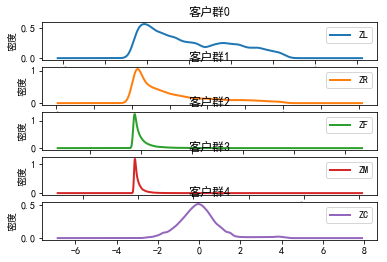

<module 'matplotlib.pyplot' from 'D:\\Program Files\\Anaconda 3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
def density_plot(data):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    p=data.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel('密度') for i in range(5)]
    [p[i].set_title('客户群%d' %i) for i in range(5)]
    plt.legend()
    plt.show()
    return plt
density_plot(data4)